
TP2 :Interpolation Numérique



En analyse numérique, une fonction f inconnue explicitement est souvent
 

– connue seulement en certains points x0, x1, ..., xd ;


– ou évaluable uniquement au moyen de l’appel à un code couteux.


Mais dans de nombreux cas, on a besoin d’effectuer des opérations (d´erivation, intégration,
...) sur la fonction f.


On cherche donc à reconstruire f par une autre fonction simple et facile à évaluer à partir
des données discrétes de f.
==> donc le but est de chercher un polynome afin de redresser la courbe


avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$                                                                       $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

In [3]:
from numpy import prod
def PR(x,y,c):
    s=[]
    n=len(x)
    for j in range(n):
        L = [c-xx for xx in x]
        
        for k in range (n):
            if (k == j):
                L[k]= 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        s.append(y[j] * prod(L))
    return sum(s)

In [6]:
x=[1 ,2 ,3, 4]
y=[-1 ,0 ,3, 1]
for i in x:
    print(PR(x,y,i))

-1.0
0.0
3.0
1.0


la fonction PR permet de donner le polynome d'interpolation .

In [8]:

def pr(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

 après la fin de la boucle k le vecteur L contient:

In [10]:
x=[1 ,2 ,3, 4]
y=[-1 ,0 ,1, 2]
for i in x:
    print(PR(x,y,i))

2.0
2.0
2.0
2.0


 la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

 le graphe du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$

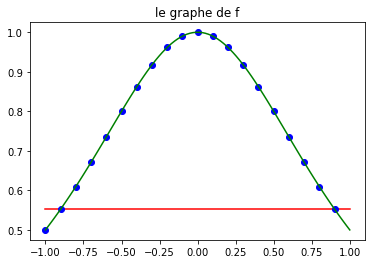

In [14]:
x=np.arange(-1,1,0.1)
pts=[]
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f(t),"g")
plt.title("le graphe de f")
plt.show()

4) On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.


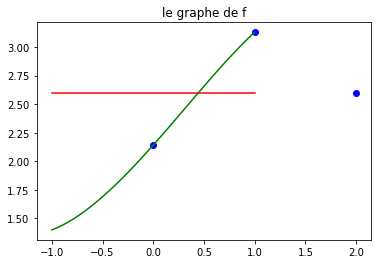

In [15]:
import math
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f2(t),"g")
plt.title("le graphe de f")
plt.show()

==> ceci est le graphe de la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$.

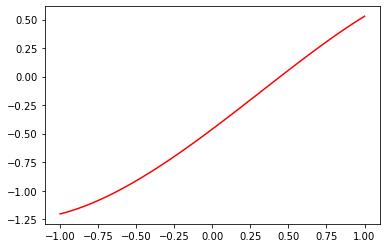

In [17]:
import math
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,f2(t)-pts,'r') 
plt.show()

==>  la courbe d'erreur (la fonction $F-p_n$)

Exercice 2 ( Phenomène de Runge )


 le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$ en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$ sur l'intervale   $[-5,5]$

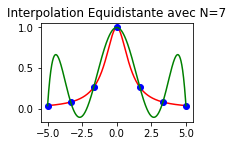

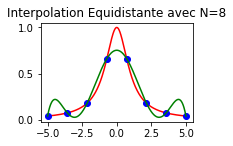

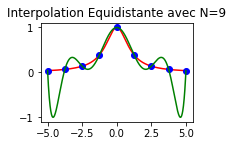

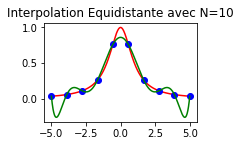

In [19]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
plt.show()
####################################################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
plt.show()
####################################################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
plt.show()
####################################################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()

plus que N est grande plus que la fonction convergent correctement .

In [20]:
def tcheb(a,b,n):
    V=[]
    for k in range (n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V

In [21]:
tcheb(-5,5,10)

[-4.698463103929543,
 -5.0,
 -4.698463103929543,
 -3.83022221559489,
 -2.5000000000000004,
 -0.8682408883346521,
 0.8682408883346515,
 2.499999999999999,
 3.8302222155948895,
 4.698463103929542]

Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

C:\anac\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


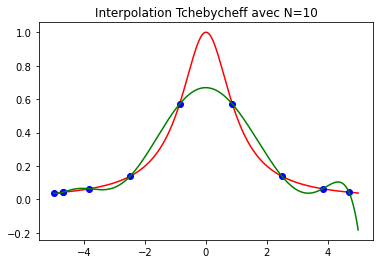

In [22]:
N=10
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
plt.show()

C:\anac\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


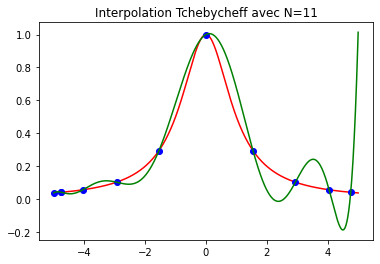

In [27]:
N=11
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
plt.show()


C:\anac\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


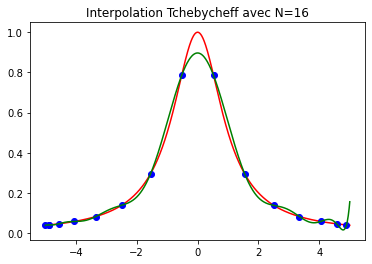

C:\anac\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


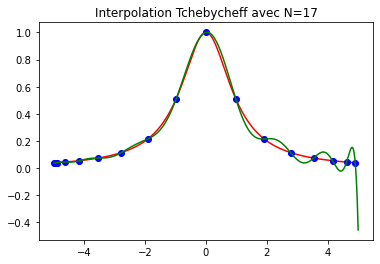

In [28]:
N=16
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
plt.show()
N=17
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
plt.show()

 l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

Exercice 3


l’interpolation polynomiale de type Newton: Etant données une suite de (n+1) points et une fonction f, on doit déterminer un polynome de degré n qui interpole f aux points considérés.

la fonction suivante permet de  calculer  le polynôme de Newton.

In [30]:
def intN(x,f):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return (f)

In [31]:

x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [32]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p  

In [33]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

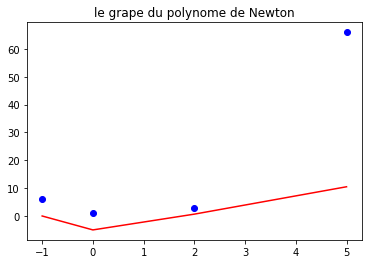

In [40]:
plt.plot(x,f,'r',x,y,'ob')
plt.title('le grape du polynome de Newton')
plt.show()

le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

In [42]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

In [41]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[1]

-118.0